--- 

### DSGA1007

--- 

### HW05 

### Due Date: Sunday 2021-11-14, 8PM


#### Student Name: Seonhye Yang

#### Student NetID: sy3420

In this HW we continue the analysis of the data "StudentsPerformance.csv" presented in Lab08:

``data is adapted from a dataset from kaggle:  
https://www.kaggle.com/spscientist/students-performance-in-exams``

The dataset "StudentsPerformance.csv" has been posted under Content for Lab08. Please download "StudentsPerformance.csv" from Brightspace.

In [229]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np

**Problem 1.1 (Points 5)** 

Read the data by using `pandas`. 

In [232]:
sp = pd.read_csv("StudentsPerformance - Copy.csv")
sp

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0
...,...,...,...,...,...,...
995,female,group E,completed,88.0,99,95.0
996,male,group C,none,NaN,55,55.0
997,female,group C,completed,59.0,71,65.0
998,female,group D,completed,68.0,78,77.0


**Problem 1.2 (Points 5)** 

Print first 10 rows of the data.

In [99]:
sp.head(10)

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0
5,female,group B,none,71.0,83,78.0
6,female,group B,completed,88.0,95,92.0
7,male,group B,none,40.0,43,39.0
8,male,group D,completed,64.0,64,67.0
9,female,group B,none,38.0,60,50.0


**Problem 1.3 (Points 5)**

How many different groups are there in this data set?

In [240]:
number_of_groups = sp["group"].unique()
num = len(number_of_groups)
print("There are", num, "different groups")

There are 5 different groups


**Problem 1.4 (Points 5)**

Print all different groups in this data set:

In [243]:
print(np.sort(number_of_groups))

['group A' 'group B' 'group C' 'group D' 'group E']


**Problem 1.5 (Points 10)**

For each group print the number of female and the number of male members: 

In [135]:
sp.groupby(['group','gender']).size()

group    gender
group A  female     36
         male       53
group B  female    104
         male       86
group C  female    180
         male      139
group D  female    129
         male      133
group E  female     69
         male       71
dtype: int64

**Problem 1.6 (Points 10)**

For each group print the percent of female and the percent of male members:

In [250]:
for group in sp["group"].drop_duplicates().sort_values():
    gender_group = sp[sp.group == group].groupby("gender").size()
    female = gender_group["female"]
    male = gender_group["male"]
    female_percent = 100*(female/(female + male))
    male_percent = 100*(male/(female+male))
    print(group, "female percentage is", female_percent, "%", "and", "male percentage is", male_percent, "%")

group A female percentage is 40.44943820224719 % and male percentage is 59.55056179775281 %
group B female percentage is 54.736842105263165 % and male percentage is 45.26315789473684 %
group C female percentage is 56.42633228840125 % and male percentage is 43.573667711598745 %
group D female percentage is 49.23664122137404 % and male percentage is 50.76335877862596 %
group E female percentage is 49.28571428571429 % and male percentage is 50.71428571428571 %


**Problem 1.7 (Points 20)**

For each of the groups plot the histogram over `math_score`. In your plots set number of bins to be `bins=50`
Note: You can plot one figure per group.

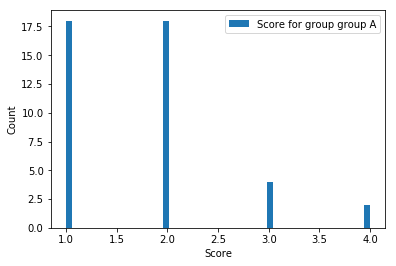

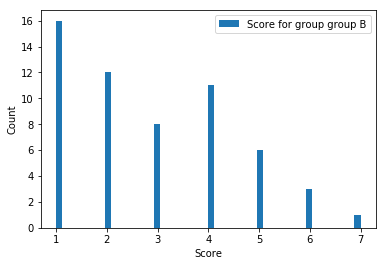

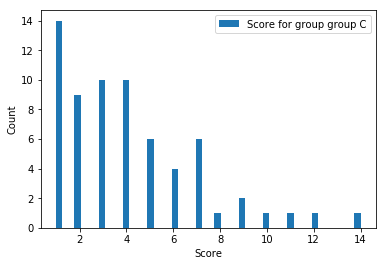

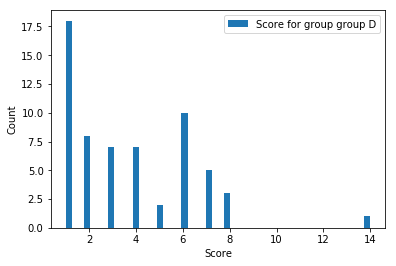

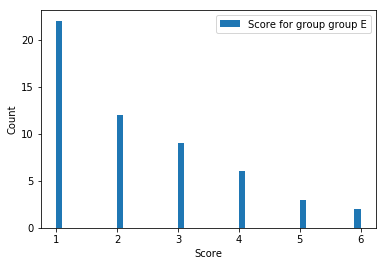

In [251]:
for math in sp["group"].drop_duplicates().sort_values():
    math_score_group = sp[sp.group == math].groupby("math score").size()
    pyplot.hist(math_score_group, bins=50, label=f"Score")
    pyplot.xlabel("Score")
    pyplot.ylabel("Count")
    pyplot.gca().legend([f"Score for group {math}"])
    pyplot.show()


**Problem 1.8 (Points 20)**


Make three diagrams that present `2D` scatter plots, where the axes are taking the column values from the data set. So the three diagrams will have the following axes: 
    
diag1: x="math score", y="reading score"

diag2: x="math score", y="writing score"

diag3: x="reading score", y="writing score"



Text(0, 0.5, 'reading score')

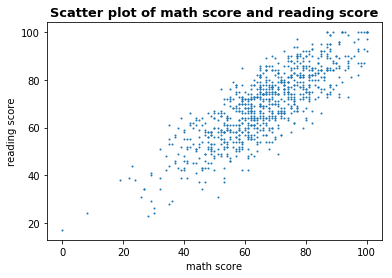

In [112]:
plt.scatter(sp["math score"], sp["reading score"], s = 1)
plt.title('Scatter plot of math score and reading score', fontsize=13, fontweight='bold')
plt.xlabel('math score')
plt.ylabel('reading score')

Text(0, 0.5, 'writing score')

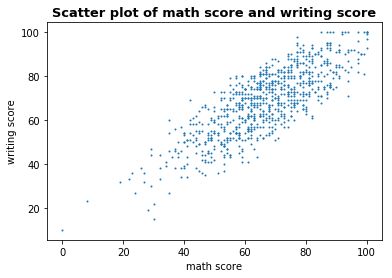

In [113]:
plt.scatter(sp["math score"], sp["writing score"], s = 1)
plt.title('Scatter plot of math score and writing score', fontsize=13, fontweight='bold')
plt.xlabel('math score')
plt.ylabel('writing score')

Text(0, 0.5, 'writing score')

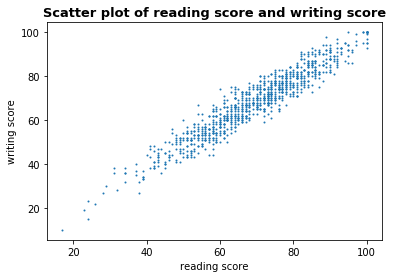

In [114]:
plt.scatter(sp["reading score"], sp["writing score"], s = 1)
plt.title('Scatter plot of reading score and writing score', fontsize=13, fontweight='bold')
plt.xlabel('reading score')
plt.ylabel('writing score')

**Problem 1.9 (Points 20)**

Normalize each of the three columns `math score`, `reading score`, `writing score` by subtracting its mean value and dividing by its standard deviation, and form three new columns: `math_score_norm`, `reading_score_norm`, `writing_score_norm`, respectively.

Perform the same task the one above (1.8) on these newly formed columns.  


In [215]:
math_avg = np.mean(sp["math score"])
math_sd = np.std(sp["math score"])
reading_avg = np.mean(sp["reading score"])
reading_sd = np.std(sp["reading score"])
writing_avg = np.mean(sp["writing score"])
writing_sd = np.std(sp["writing score"])

math_score_norm = (sp["math score"]-math_avg)/math_sd
reading_score_norm = (sp["reading score"]-reading_avg)/reading_sd
writing_score_norm = (sp["writing score"]-writing_avg)/writing_sd

Text(0, 0.5, 'reading score norm')

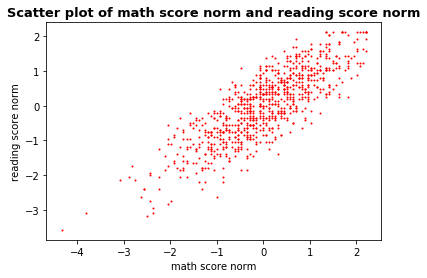

In [225]:
plt.scatter(math_score_norm, reading_score_norm, s = 1, color = "r")
plt.title('Scatter plot of math score norm and reading score norm', fontsize=13, fontweight='bold')
plt.xlabel('math score norm')
plt.ylabel('reading score norm')

Text(0, 0.5, 'writing score norm')

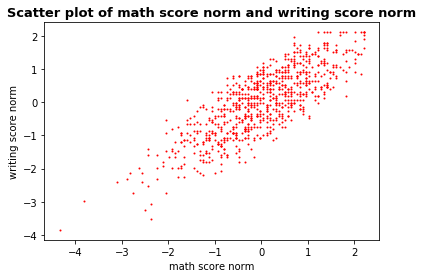

In [223]:
plt.scatter(math_score_norm, writing_score_norm, s = 1, color = "r")
plt.title('Scatter plot of math score norm and writing score norm', fontsize=13, fontweight='bold')
plt.xlabel('math score norm')
plt.ylabel('writing score norm')

Text(0, 0.5, 'writing score norm')

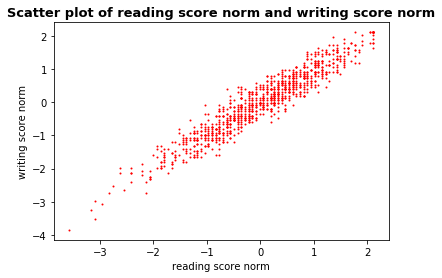

In [227]:
plt.scatter(reading_score_norm, writing_score_norm, s = 1, color = "r")
plt.title('Scatter plot of reading score norm and writing score norm', fontsize=13, fontweight='bold')
plt.xlabel('reading score norm')
plt.ylabel('writing score norm')